___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Alexandre Edington

## Bruno Cury

## Matheus Soares

___

___

## INTRODUÇÃO


Não vem de hoje o grande interesse da sociedade em vídeo games, porém, há aproximadamente dez anos atrás, a visão que tínhamos sobre o ato de jogar vídeo game e sua indústria era completamente diferente.
Em 2007 os jogos com maiores ambições comerciais projetavam um lucro multimilionário e a venda dos mesmos era feita através de discos que seriam rodados em seu console de preferência.
Hoje em dia os consoles são apenas uma parcela do vasto universo de aparelhos que rodam vídeo games, e a venda destes jogos já não se da mais por discos, sua grande maioria vem de downloads e seus lucros são projetados na faixa dos biliões de dólares. Os videogames são agora, onipresentes em nossas vidas, qualquer um com um smartphone tem acesso a uma variedade de jogos, disponíveis na plataforma de download do seu sistema operacional (iOS, Android, google play), ou até nas redes sociais como Facebook, que se tornou uma grande plataforma de jogos online. 
Com isso em mente, resolvemos analisar os dados da maior plataforma de download de vídeo games da internet, afim de quantificar o impacto dos jogos no mundo por meio da análise de suas características mais importantes. E então, a partir desta análise, predizer o sucesso (ou falta dele) na arrecadação mundial de algum jogo, através do input de algumas de suas características.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados utilizados neste experimento foram retirados na integra do site data.world, onde são disponibilizados diversos bancos de dados; o Dataset escolhido é inteiramente referente às características dos jogos disponíveis na plataforma Steam. Inicialmente, o banco de dados em questão contava com mais de 70 variáveis e uma ampla quantidade de dados, porém o mesmo precisou ser filtrado, em prol da eficiência e organização foi feita a retirada de variáveis indesejadas e a retirada de dados nulos. Escolhemos também agrupar algumas variáveis, como as entradas de gênero (Indie, Action, Adventure, Casual, Strategy, RPG, Simulation, Sports, Racing), que se tornaram uma só variável, assim como a compatibilidade com Mac, Linux e Windows se tornaram uma só entrada.

In [2]:
import pandas as pd
import os
from collections import Counter
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as math


In [3]:
df = pd.read_csv("games-features.csv",error_bad_lines=False,sep=";")

### BASE DE DADOS

In [4]:
dados = pd.DataFrame()
dados["NOME"] = df["ResponseName"]
dados["LANCAMENTO"] = df["ReleaseDate"]
dados["ACHIEVEMENTS"] = df["AchievementCount"]
dados["LINGUAS"] = df["SupportedLanguages"]
dados["LINGUAS_N"] = df["SupportedLanguages"]
dados["INDIE"] = df["GenreIsIndie"]
dados["ACTION"] = df["GenreIsAction"]
dados["ADVENTURE"] = df["GenreIsAdventure"]
dados["CASUAL"] = df["GenreIsCasual"]
dados["STRATEGY"] = df["GenreIsStrategy"]
dados["RPG"] = df["GenreIsRPG"]
dados["SIMULATION"] = df["GenreIsSimulation"]
dados["SPORTS"] = df["GenreIsSports"]
dados["RACING"] = df["GenreIsRacing"]
dados["NUM_PROPRIETARIOS"] = df["SteamSpyOwners"]
dados["PRECO_INICIAL"] = df["PriceInitial"]
dados["PRECO_FINAL"] = df["PriceFinal"]

In [5]:
remover=["with","full","audio","support","Traditional","Simplified"]

for i in range(len(dados)):
    tempa=dados.LINGUAS_N[i].split(" ")
    for a in remover:
        if a in tempa:
            tempa.remove(a)
    dados.LINGUAS_N[i]=len(tempa)

C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Analise Descritiva

In [ ]:
def Plataforma(df):
    a = df.PlatformWindows
    b = df.PlatformMac
    c = df.PlatformLinux
    
    if (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "Windows Linux Mac"
    elif (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "FALSO"): return "Windows Mac"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "FALSO"): return "Windows"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "Mac Linux"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "FALSO"): return "Mac"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "VERDADEIRO"): return "Windows Linux"
    elif (a == "FALSO" and b == "FALSO" and c == "VERDADEIRO"): return "Linux"
    else: return "Nenhuma Plataforma"

Input = df.apply(Plataforma,axis=1)
dados["PLATAFORMAS"] = Input


def Jogabilidade(df):
    a = df.CategoryMultiplayer
    b = df.CategorySinglePlayer
    c = df.CategoryCoop
    
    if (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "MultiPlayer SinglePlayer Coop"
    elif (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "FALSO"): return "MultiPlayer  SinglePlayer"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "FALSO"): return "MultiPlyer"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "SinglePlayer Coop"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "FALSO"): return "SinglePlayer"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "VERDADEIRO"): return "MultiPlayer Coop"
    elif (a == "FALSO" and b == "FALSO" and c == "VERDADEIRO"): return "Coop"
    else: return "Outra"
    
Input2 = df.apply(Jogabilidade,axis=1)
dados["JOGABILIDADE"] = Input2


dados.loc[(dados.PRECO_INICIAL < 999), "QUALIFICACAO"] = "A"
dados.loc[(dados.PRECO_INICIAL > 999) & (dados.PRECO_INICIAL <15999), "QUALIFICACAO"] = "AA"
dados.loc[(dados.PRECO_INICIAL > 15999), "QUALIFICACAO"] = "AAA"

dados.loc[(dados.NUM_PROPRIETARIOS < 25000), "FAIXA_VENDAS"] = "De 0 a 50 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 25000) & (dados.NUM_PROPRIETARIOS <50000), "FAIXA_VENDAS"] = "De 25 a 50 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 50000) & (dados.NUM_PROPRIETARIOS <100000), "FAIXA_VENDAS"] = "De 50 a 100 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 100000) & (dados.NUM_PROPRIETARIOS <500000), "FAIXA_VENDAS"] = "De 100 a 500 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 500000) & (dados.NUM_PROPRIETARIOS <1000000), "FAIXA_VENDAS"] = "De 500 mil a 1 milhão"
dados.loc[(dados.NUM_PROPRIETARIOS > 1000000) & (dados.NUM_PROPRIETARIOS <5000000), "FAIXA_VENDAS"] = "De 1 a 5 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 5000000) & (dados.NUM_PROPRIETARIOS <10000000), "FAIXA_VENDAS"] = "De 5 a 10 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 10000000) & (dados.NUM_PROPRIETARIOS <15000000), "FAIXA_VENDAS"] = "De 10 a 15 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 20000000), "FAIXA_VENDAS"] = "mais de 20 milhões"

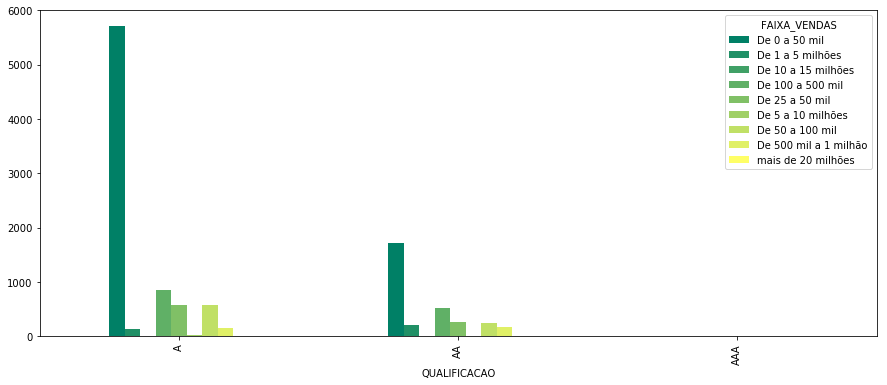

In [16]:
cross_qualificacao = pd.crosstab(dados.QUALIFICACAO,dados.FAIXA_VENDAS)
cross_qualificacao.plot(kind = "bar",figsize = (15,6),colormap = "summer")

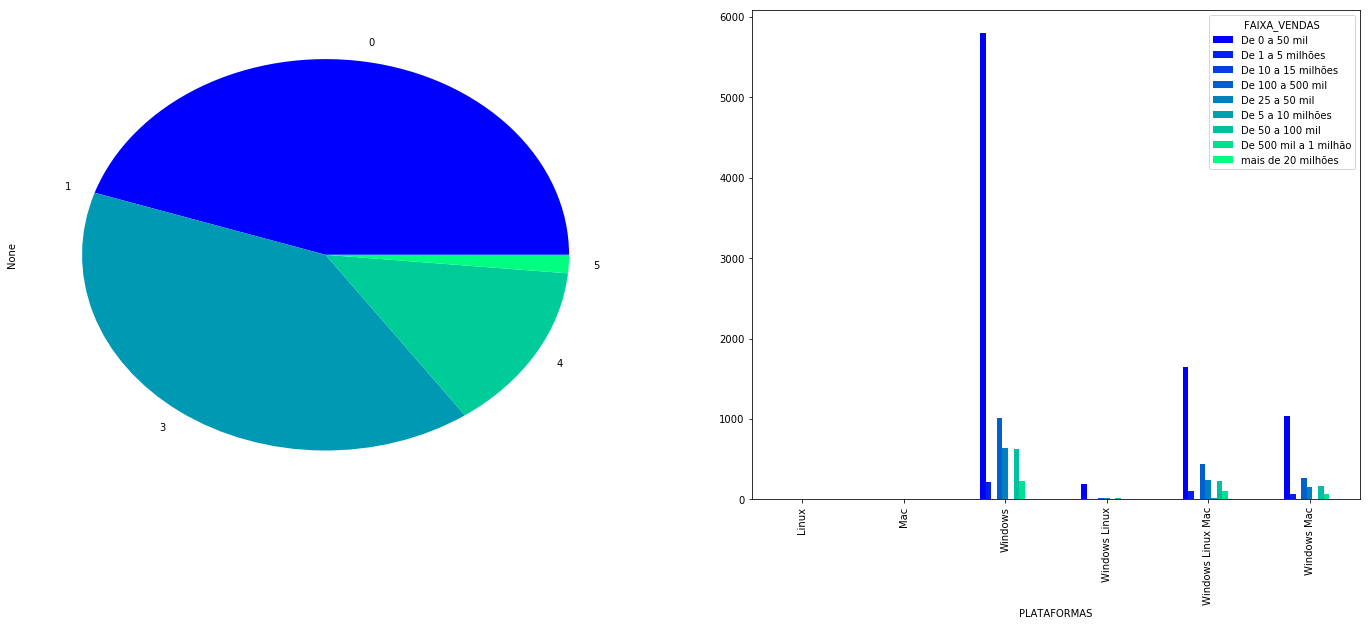

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

Vendas_Windows = dados[dados.PLATAFORMAS == "Windows"].NUM_PROPRIETARIOS.sum()
Vendas_Mac = dados[dados.PLATAFORMAS == "Mac"].NUM_PROPRIETARIOS.sum()
Vendas_Linux = dados[dados.PLATAFORMAS == "Linux"].NUM_PROPRIETARIOS.sum()
Vendas_WLM = dados[dados.PLATAFORMAS == "Windows Linux Mac"].NUM_PROPRIETARIOS.sum()
Vendas_WM = dados[dados.PLATAFORMAS == "Windows Mac"].NUM_PROPRIETARIOS.sum()
Vendas_WL = dados[dados.PLATAFORMAS == "Windows Linux"].NUM_PROPRIETARIOS.sum()

l_Vendas_Plat = [Vendas_Windows,Vendas_Mac,Vendas_Linux,Vendas_WLM,Vendas_WM,Vendas_WL]
l_Vendas_Plat = pd.Series(l_Vendas_Plat)
l_Vendas_Plat.plot(kind = "pie",colormap = "winter",ax = axes[0],figsize = (24,9))

cross_plataformas = pd.crosstab(dados.PLATAFORMAS,dados.FAIXA_VENDAS)
cross_plataformas.plot(kind = "bar",colormap = "winter",ax = axes[1],figsize = (24,9))

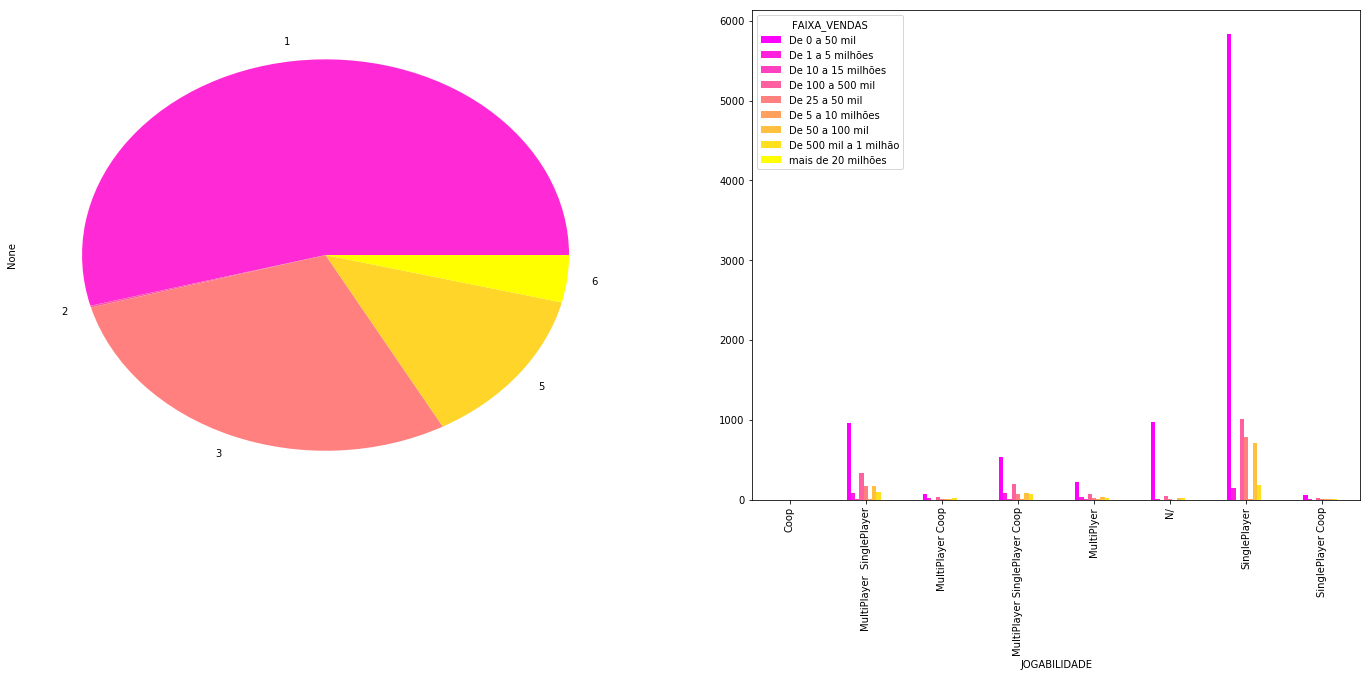

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

Vendas_M = dados[dados.JOGABILIDADE == "MultiPlayer"].NUM_PROPRIETARIOS.sum()
Vendas_S = dados[dados.JOGABILIDADE == "SinglePlayer"].NUM_PROPRIETARIOS.sum()
Vendas_C = dados[dados.JOGABILIDADE == "Coop"].NUM_PROPRIETARIOS.sum()
Vendas_MSC = dados[dados.JOGABILIDADE == "MultiPlayer SinglePlayer Coop"].NUM_PROPRIETARIOS.sum()
Vendas_MS = dados[dados.JOGABILIDADE == "MultiPlayer SinglePlayer"].NUM_PROPRIETARIOS.sum()
Vendas_MC = dados[dados.JOGABILIDADE == "MultiPlayer Coop"].NUM_PROPRIETARIOS.sum()
Vendas_SC = dados[dados.JOGABILIDADE == "SinglePlayer Coop"].NUM_PROPRIETARIOS.sum()

l_Vendas_Jog = [Vendas_M,Vendas_S,Vendas_C,Vendas_MSC,Vendas_MS,Vendas_MC,Vendas_SC]
l_Vendas_Jog = pd.Series(l_Vendas_Jog)
l_Vendas_Jog.plot(kind = "pie",colormap = "spring",ax = axes[0],figsize = (3,3))

cross_jogabilidade = pd.crosstab(dados.JOGABILIDADE,dados.FAIXA_VENDAS)
cross_jogabilidade.plot(kind = "bar",colormap = "spring",ax = axes[1],figsize = (24,9))

In [62]:
indie = dados[dados.INDIE == "VERDADEIRO"].INDIE
action = dados[dados.ACTION == "VERDADEIRO"].ACTION
adventure = dados[dados.ADVENTURE == "VERDADEIRO"].ADVENTURE
casual = dados[dados.CASUAL == "VERDADEIRO"].CASUAL
strategy = dados[dados.STRATEGY == "VERDADEIRO"].STRATEGY
rpg = dados[dados.RPG == "VERDADEIRO"].RPG
simulation = dados[dados.SIMULATION == "VERDADEIRO"].SIMULATION
sports = dados[dados.SPORTS == "VERDADEIRO"].SPORTS
racing = dados[dados.RACING == "VERDADEIRO"].RACING


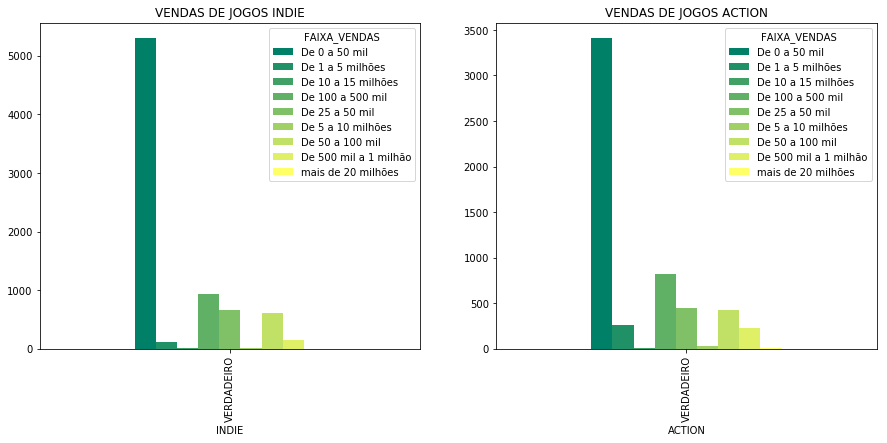

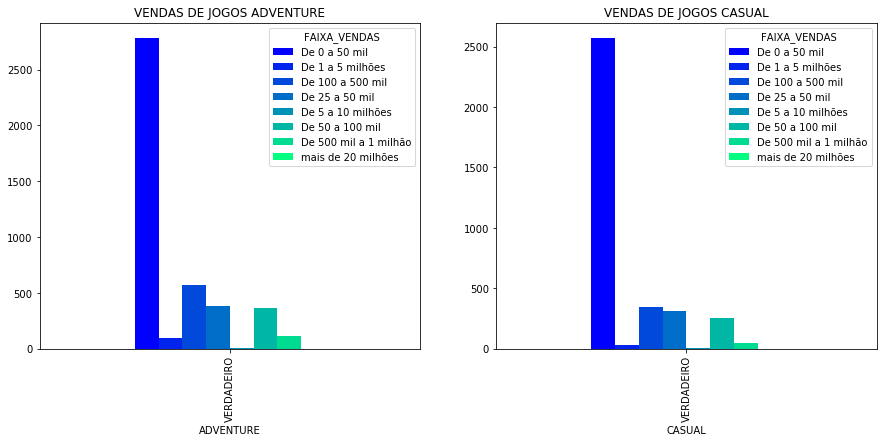

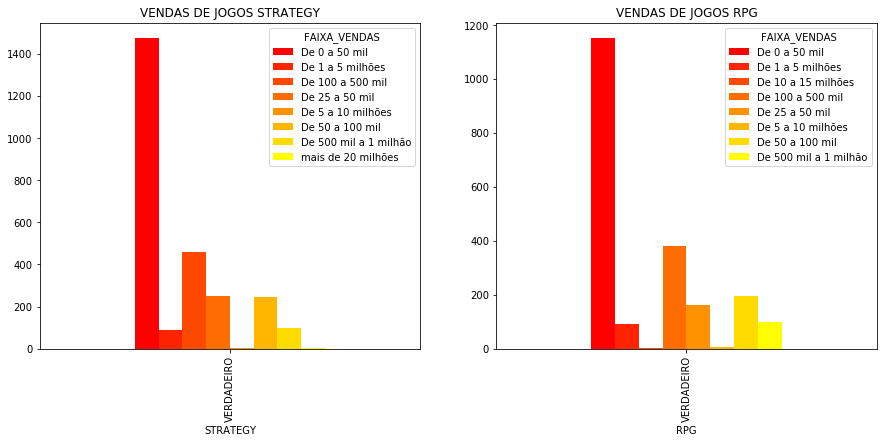

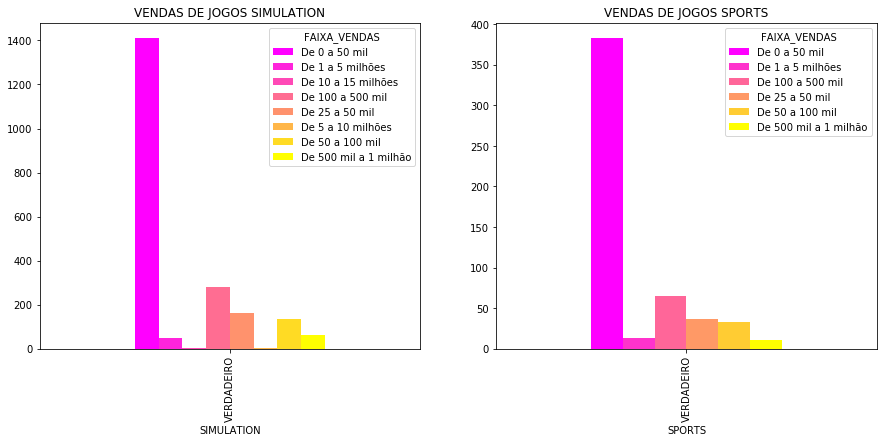

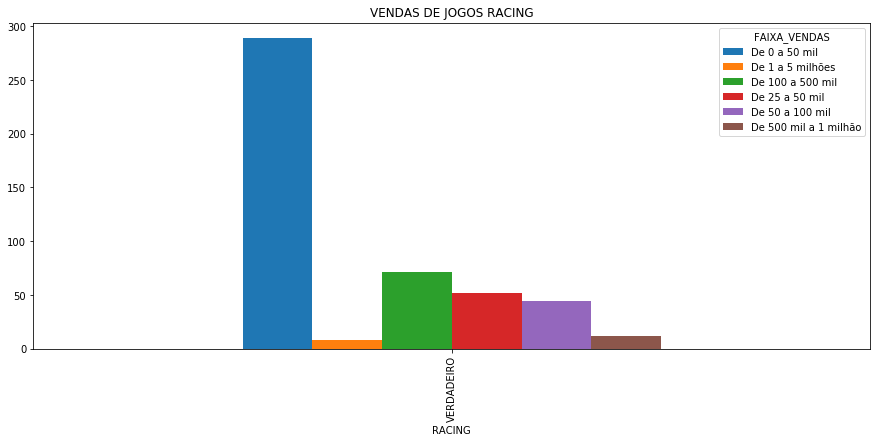

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(indie,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS INDIE')
pd.crosstab(action,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS ACTION')

fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(adventure,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6), colormap = 'winter',title = 'VENDAS DE JOGOS ADVENTURE')
pd.crosstab(casual,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6), colormap = 'winter',title = 'VENDAS DE JOGOS CASUAL')

fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(strategy,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6),colormap = 'autumn',title = 'VENDAS DE JOGOS STRATEGY')
pd.crosstab(rpg,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6),colormap = 'autumn',title = 'VENDAS DE JOGOS RPG')

fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(simulation,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6),colormap = 'spring',title = 'VENDAS DE JOGOS SIMULATION')
pd.crosstab(sports,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6),colormap = 'spring',title = 'VENDAS DE JOGOS SPORTS')
pd.crosstab(racing,dados.FAIXA_VENDAS).plot(kind = 'bar',figsize = (15,6),title = 'VENDAS DE JOGOS RACING')

C:\Users\Bruno\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


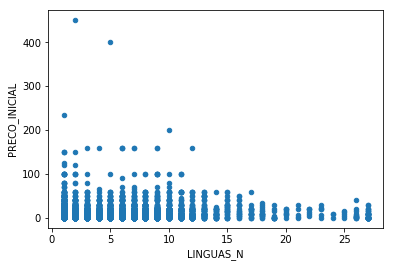

In [76]:
df = dados[['LINGUAS_N','PRECO_INICIAL']]
df.PRECO_INICIAL /= 100
df.plot.scatter('LINGUAS_N','PRECO_INICIAL')

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [15]:
#MODELO DE PREDICAO PELA MEDIA

y = dados.NUM_PROPRIETARIOS.mean()
f = dados.NUM_PROPRIETARIOS.mean()
yi = dados.NUM_PROPRIETARIOS
n = len(dados)


# coeficiente de determinação (R2) E raiz do erro médio quadrático (RMS).
def CoefDet(y,f,yi):
    
    num = ((yi-f)**2).sum()
    den = ((yi-y)**2).sum()
    R2 = 1 - (num/den)
    
    return[R2]

def RSM(y,f,yi):
    som = ((yi-y)**2).sum()
    rsm = (1/n)*som
    
    return[rsm]


___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS